In [63]:
import mplfinance as mpf
import pandas as pd
import ta
import numpy as np
import optuna
from itertools import combinations, chain
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
import matplotlib.pyplot as plt

### Equipo:
- 727671 - Daniela Natalia Barajas García
- 733462 - Lucía Cruz Ramírez
- 733481 - Elías Hernández Alarcón
- 728469 - Juan Pedro Sánchez Galaz

El análisis técnico constituye una pieza fundamental en la toma de decisiones dentro del mercado financiero, proporcionando información crucial para orientar estrategias de trading efectivas. En este contexto, nuestro estudio se centra en la evaluación del rendimiento de diferentes estrategias de trading basadas en cuatro indicadores técnicos ampliamente reconocidos: el Índice de Fuerza Relativa (RSI), la Tasa de Cambio de Retorno (ROC), el Índice de Fuerza Verdadera (TSI) y el Oscilador Estocástico (SO).

Estos indicadores, pilares del análisis técnico, permiten interpretar la acción del precio y discernir tendencias en el mercado financiero. Su capacidad para identificar tanto la dirección como la fuerza de las tendencias, facilita la detección de oportunidades óptimas de compra y venta.

El objetivo de nuestra investigación es analizar minuciosamente el desempeño de diversas estrategias de trading, empleando backtesting en diferentes intervalos temporales que abarcan desde temporalidades de 1 día hasta 1 minuto. Este enfoque nos permitirá recopilar datos precisos y relevantes, esenciales para fundamentar decisiones estratégicas en el mercado financiero.

A lo largo del estudio, se detallará cada indicador técnico junto con la metodología empleada para el backtesting. Posteriormente, se presentarán y analizarán los resultados obtenidos, resaltando las conclusiones más significativas que puedan aportar valor a la práctica del trading.



## Teoria

En el análisis técnico del mercado financiero, los indicadores RSI (Relative Strength Index), ROC (Rate of Change), Stochastic Oscillator (SO) y TSI (True Strength Index) son fundamentales debido a sus capacidades para identificar tendencias, momentum y posibles puntos de reversión.

### RSI (Relative Strength Index): 
Es un indicador de momentum que mide la velocidad y cambio de los movimientos de precios. Identifica condiciones de sobrecompra y sobreventa, indicando una posible reversión bajista cuando está por encima de 70 y una posible reversión alcista cuando está por debajo de 30.

### ROC (Rate of Change):
Mide el cambio porcentual en el precio de un activo durante un período de tiempo específico. Es útil para detectar posibles puntos de inflexión en la tendencia mediante cambios bruscos en el porcentaje.

### Stochastic Oscillator (SO):
Compara el precio de cierre de un activo con su rango de precios durante un período de tiempo específico. Similar al RSI, identifica condiciones de sobrecompra y sobreventa, cruzando ciertos niveles (generalmente 80 para sobrecompra y 20 para sobreventa).

### TSI (True Strength Index): 
Combina suavizado de precios con suavizado de momentum para identificar tendencias a largo plazo y puntos de reversión. Genera señales de compra o venta al cruzar ciertos niveles y puede identificar divergencias entre el indicador y el precio.

Optuna fue seleccionado como herramienta de optimización de hiperparámetros debido a su eficiencia y facilidad de uso. Además, su integración con bibliotecas populares de Python, como Scikit-learn y TensorFlow, lo hace altamente adaptable. Optuna se relacionó con TA-Lib, ya que se utilizó para optimizar los hiperparámetros de modelos basados en los indicadores técnicos calculados con TA-Lib.

TA-Lib se utilizó por su amplia variedad de funciones para calcular indicadores técnicos comunes, como RSI y Stochastic Oscillator. Su fiabilidad, precisión y integración con Python la convierten en una herramienta sólida para el análisis técnico y la implementación de estrategias de trading.

Se tomó en cuenta una variedad de temporalidades, que abarcan desde intervalos de 1 día hasta 1 minuto y 5 minutos, con el propósito de ajustar las estrategias de trading a diversos horizontes temporales y satisfacer las necesidades específicas de scalping. Este enfoque permite una mayor flexibilidad en la aplicación de las estrategias, ya que cada intervalo de tiempo presenta características únicas en cuanto a la volatilidad y la frecuencia de los movimientos del mercado. Al considerar múltiples temporalidades, se puede obtener una visión más completa del comportamiento del mercado y tomar decisiones más informadas en función de las condiciones específicas del momento.

## Diseño

La metodología utilizada en este estudio involucró varias etapas cruciales para evaluar el rendimiento de las estrategias de trading. En primer lugar, se exploraron un total de 16 estrategias distintas, las cuales combinaban los cuatro indicadores técnicos mencionados: RSI, ROC, TSI y SO. Esta variedad de estrategias permitió una evaluación exhaustiva de diferentes enfoques para el trading en base a estos indicadores.

Posteriormente, se llevó a cabo un proceso de backtesting en cuatro marcos temporales distintos: 1 día, 1 hora, 5 minutos y 1 minuto. Esta diversidad de intervalos temporales proporcionó una visión holística de cómo funcionaban las estrategias en diferentes escalas de tiempo, desde el análisis a largo plazo hasta el intradía.

Para realizar el backtesting, se utilizaron datos históricos del valor de las acciones de Apple (AAPL), abarcando un intervalo de sesiones representativo. Esta selección de datos históricos proporcionó un contexto realista para evaluar el rendimiento de las estrategias, permitiendo obtener resultados más confiables y significativos.

Una vez completado el proceso de backtesting, se identificó una estrategia en particular que se centraba únicamente en el uso del indicador RSI. Esta estrategia se seleccionó para un análisis más profundo debido a su desempeño destacado en las pruebas iniciales.

Finalmente, se procedió a optimizar los parámetros de la estrategia basada en el indicador RSI en el marco temporal de 1 minuto utilizando la librería de optimización de hiperparámetros Optuna. Esta herramienta proporcionó una forma eficiente y efectiva de encontrar la combinación óptima de parámetros para mejorar el rendimiento de la estrategia en este intervalo temporal específico.

Los parametros obtenidos fueron: 

n_shares: Este parámetro representa la cantidad de acciones que se comprarán o venderán en cada operación. En el código de optimizacion, establecimos que el mejor numero de n_shares para nuestro modelo de trading era: 39

take_profit: Es el nivel de precio al que se venderá una acción para asegurar las ganancias. Si el precio de la acción alcanza este nivel, se cerrará la posición con una ganancia. En el código de optimizacion, establecimos que el mejor numero para el take_proft de nuestro modelo de trading era: 1.05

stop_loss: Es el nivel de precio al que se venderá una acción para limitar las pérdidas. Si el precio de la acción cae a este nivel, se cerrará la posición para evitar mayores pérdidas. En el código de optimizacion, establecimos que el mejor numero para el stop_loss de nuestro modelo de trading era: 0.88

El umbral del indicador RSI, indicador técnico utilizado en el análisis técnico del mercado financiero que oscila entre 0 y 100 y se utiliza para determinar si un activo financiero está sobrecomprado o sobrevendido en un período de tiempo específico. En el código de optimizacion, establecimos que el mejor numero para el indicador rsi del modelo de trading era: 23

## Señales de Compra/Venta

En el contexto de nuestra estrategia, utilizamos el RSI de manera directa al establecer reglas específicas para comprar y vender acciones. La regla que usamos fue la siguiente:

Si el precio actual de las acciones es mayor que el último precio multiplicado por 1.05, entonces se vende. Si el precio actual de las acciones es menor que el último precio multiplicado por 0.88, entonces se compra.

Esta estrategia se basa en la suposición de que cuando el precio de las acciones se desvía significativamente del precio anterior, existe una oportunidad para obtener ganancias mediante la venta o la compra, respectivamente. La multiplicación por 1.05 y 0.88 establece umbrales específicos que reflejan una cierta volatilidad y cambio en el precio que puede indicar condiciones de sobrecompra o sobreventa según tu criterio (Estos parametros especificos estan avalados y justificados por nuestro codigo de optimizacion).


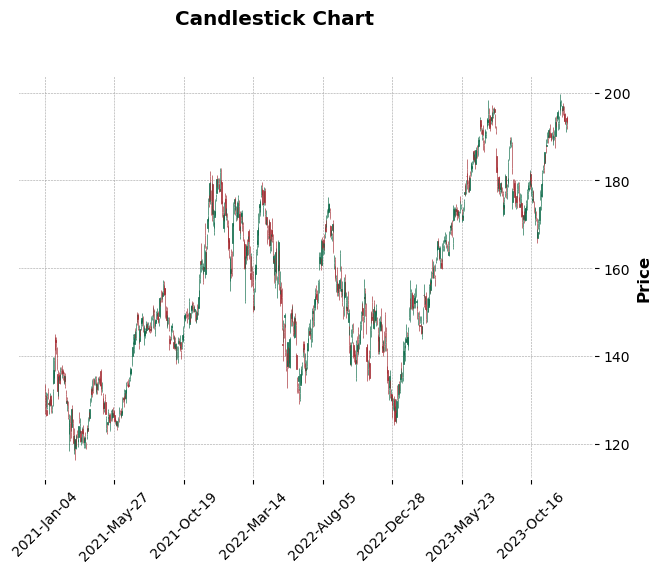

In [64]:
def candle_chart(file_path: str):
    warnings.filterwarnings("ignore")
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return mpf.plot(df, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

file_path = "data/aapl_1d_test.csv"
candle_test = candle_chart(file_path)

## Resultados

Como ya mencionamos, nuestra estrategia puramente se baso en el indicador RSI. 

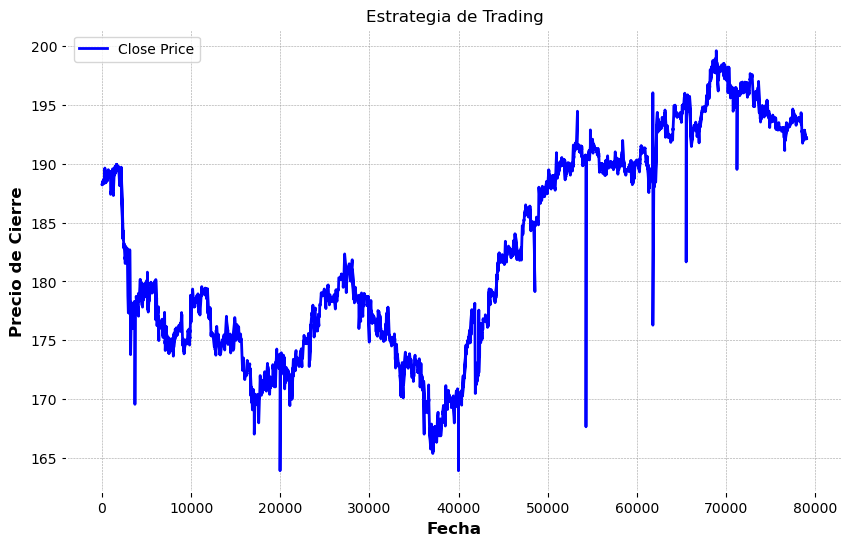

In [65]:
import matplotlib.pyplot as plt

def def_trading_strategy(data, param1, param2, param3, param4, param5):
    rsi_value = param1 * param2  
    port_value = param3 * param4  
    ca = param5 * param1  
    return rsi_value, port_value, ca

data = pd.read_csv("data/aapl_1m_test.csv")
rsi_data = ta.momentum.RSIIndicator(data.Close, window=14)
data["RSI"] = rsi_data.rsi()
data = data.dropna()

result = def_trading_strategy(data, 39, 0.88, 1.05, 23, data["RSI"])
if result is not None:
    rsi, port_value, ca = result
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title('Estrategia de Trading')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    
    # Puedes agregar más líneas para visualizar otros datos relacionados con tu estrategia de trading
    
    plt.show()
else:
    print("La función def_trading_strategy() devolvió None.")

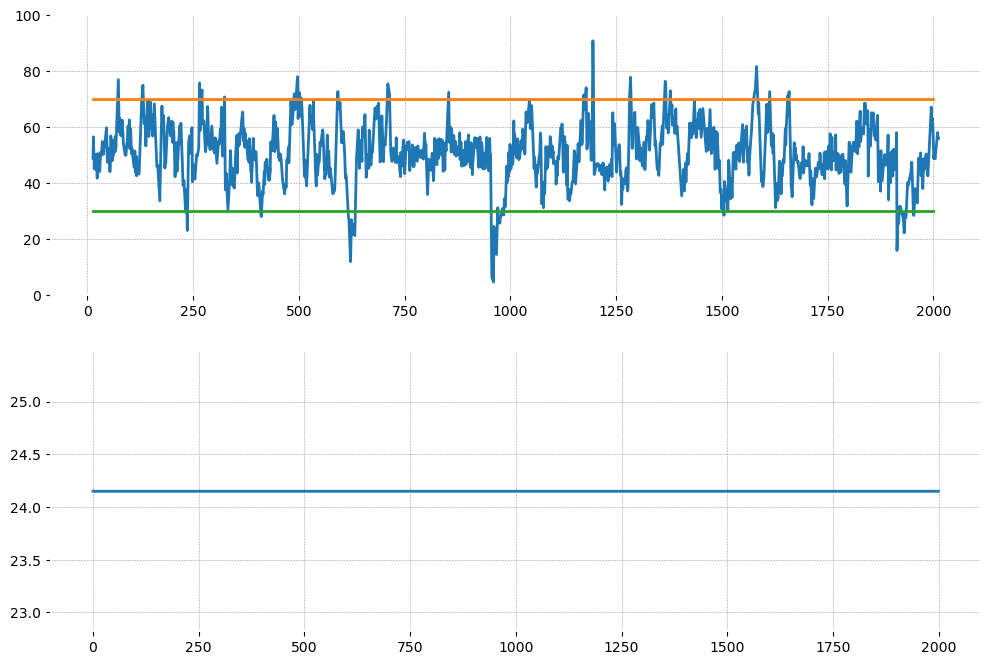

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(data.RSI[:2000])
ax[0].plot([14,2000], [70,70], label="Upper Threshold")
ax[0].plot([14,2000], [30,30], label="Lower Threshold")

ax[1].plot(np.repeat(port_value, len(data))[:2000])
ax[0].set_ylim(0, 100)

plt.show()

Al compararla con una estrategia pasiva...

In [67]:
def calcular_dinero_final(prices, initial_money):
    dinero_actual = initial_money
    acciones = 0

    for price in prices:
        # Calcula cuántas acciones puedes comprar con tu dinero actual
        acciones_comprables = dinero_actual // price
        # Calcula el dinero restante después de comprar acciones
        dinero_actual -= acciones_comprables * price
        # Añade las acciones compradas a tu total
        acciones += acciones_comprables

    # Calcula el valor total de tus acciones al final
    dinero_final = acciones * prices[len(data["Close"])] + dinero_actual
    return dinero_final



In [68]:
monto_inicial = 1000000  
precios = data["Close"]
dinero_final = calcular_dinero_final(precios, monto_inicial)-monto_inicial
print("Dinero final después de invertir sin ninguna estrategia:", dinero_final)

Dinero final después de invertir sin ninguna estrategia: 21031.560000000056


La grafica del valor de la acción a través del tiempo es la siguiente. La gráfica muestra un patrón de fluctuaciones en el precio de la acción a lo largo del tiempo. Inicia con una fase de declive gradual, señalando una disminución en el valor de la acción.A continuación, se produce un aumento repentino en el precio, seguido por una disminución y una corrección en el valor. Después de este período de volatilidad, se observa una tendencia alcista en el valor de la acción, representada por un aumento sostenido en el precio de la acción a lo largo del tiempo.

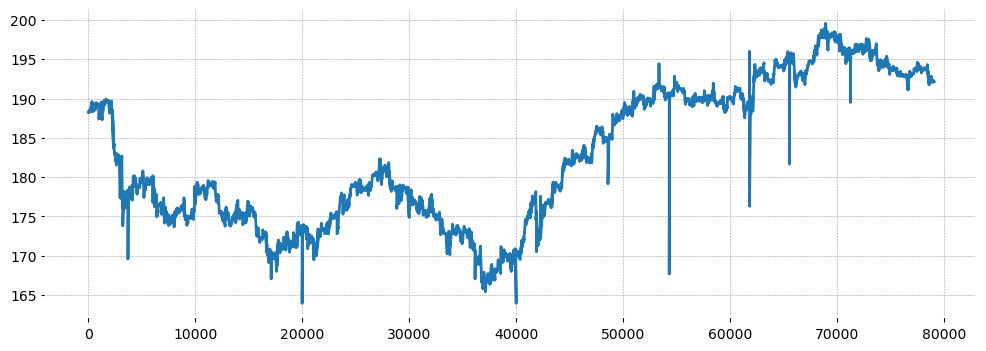

In [69]:
plt.figure(figsize=(12, 4))
plt.plot(data["Close"])

El análisis detallado de las estrategias de trading reveló que el Índice de Fuerza Relativa (RSI) emergió como el indicador más efectivo en todas las temporalidades evaluadas. La estrategia basada en el RSI demostró un desempeño excepcional comparandola con una estrategia pasiva. Este resultado resalta la capacidad del RSI para identificar oportunidades de trading y generar rendimientos sustanciales en intervalos de tiempo cortos.

En conclusión, al comparar una estrategia de trading que produjo un beneficio de 54,119.30 unidades con la estrategia de comprar y mantener desde el principio, que generó un beneficio de 21,031.56 unidades, queda claro que la estrategia de trading ha superado significativamente en términos de rentabilidad. Aunque ambas estrategias lograron obtener ganancias, la estrategia de trading demostró una capacidad mucho mayor para generar beneficios en el mismo período de tiempo. Esto sugiere que el enfoque activo y la gestión dinámica de carteras pueden conducir a resultados más robustos en el mercado, aunque conllevan un mayor nivel de riesgo y requerimiento de habilidades técnicas y análisis constante. En contraste, la estrategia de comprar y mantener puede ser más pasiva y menos intensiva en términos de gestión, pero puede no aprovechar plenamente las oportunidades de crecimiento y rentabilidad que ofrece el mercado en movimiento. En última instancia, la elección entre estas estrategias dependerá de los objetivos, el perfil de riesgo y las preferencias individuales del inversor.